In [1]:
import pandas as pd
feats = pd.read_csv("bank_data_feats_a2.csv")
target = pd.read_csv("bank_data_target_e3.csv")

In [2]:
from sklearn.model_selection import train_test_split
test_size = 0.2
random_state = 42

In [3]:
X_train, X_test, y_train, y_test = train_test_split(feats, target, test_size=test_size, random_state=random_state)

In [4]:
from keras.models import Sequential
model = Sequential()

Using TensorFlow backend.


In [5]:
from keras.layers import Dense
model.add(Dense(1, input_dim=X_train.shape[1]))

In [6]:
from keras.layers import Activation
model.add(Activation("sigmoid"))

In [7]:
model.compile(optimizer="adam", loss="binary_crossentropy" , metrics=["accuracy"])

In [8]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 33        
_________________________________________________________________
activation_1 (Activation)    (None, 1)                 0         
Total params: 33
Trainable params: 33
Non-trainable params: 0
_________________________________________________________________
None


In [9]:
history = model.fit(X_train, y_train["y"], epochs=10, validation_split=0.2)

Train on 26360 samples, validate on 6590 samples
Epoch 1/10
26360/26360 [==============================] - 1s 34us/step - loss: 21.3335 - accuracy: 0.8917 - val_loss: 2.0213 - val_accuracy: 0.9009
Epoch 2/10
26360/26360 [==============================] - 1s 30us/step - loss: 1.1688 - accuracy: 0.8677 - val_loss: 1.0398 - val_accuracy: 0.7590
Epoch 3/10
26360/26360 [==============================] - 1s 30us/step - loss: 0.9443 - accuracy: 0.8676 - val_loss: 0.8285 - val_accuracy: 0.9027
Epoch 4/10
26360/26360 [==============================] - 1s 29us/step - loss: 0.7593 - accuracy: 0.8729 - val_loss: 1.8395 - val_accuracy: 0.5762
Epoch 5/10
26360/26360 [==============================] - 1s 30us/step - loss: 0.6934 - accuracy: 0.8739 - val_loss: 0.4479 - val_accuracy: 0.8873
Epoch 6/10
26360/26360 [==============================] - 1s 30us/step - loss: 0.6389 - accuracy: 0.8739 - val_loss: 0.3224 - val_accuracy: 0.9064
Epoch 7/10
26360/26360 [==============================] - 1s 30us/st

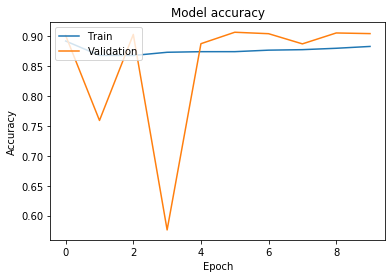

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
# Plot training and validation accuracy values
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc="upper left")
plt.show()

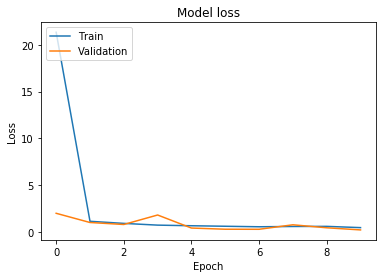

In [11]:
# Plot training and validation loss values
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc="upper left")
plt.show()

In [12]:
test_loss, test_acc = model.evaluate(X_test, y_test["y"])
print(f"The loss on the test set is {test_loss:.4f} and the accuracy is {test_acc*100:.3f}%")

8238/8238 [==============================] - 0s 15us/step
The loss on the test set is 0.2447 and the accuracy is 90.762%
